In [2]:
#Set up Dependencies
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#hollinger_df -- 2002 - 2018 individual advanced metrics from Kaggle 
hollinger_df = pd.read_csv("kaggle_hollinger/datasets_73420_164286_hollingersStats.csv")
hollinger_df.head()

,Unnamed: 0,rank,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,player,team,season
0,1,1,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,31.01,452.0,15.1,Tracy McGrady,ORL,2002-03
1,2,2,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,29.43,356.2,11.9,Shaquille O'Neal,LAL,2002-03
2,3,3,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,27.07,420.6,14.0,Kobe Bryant,LAL,2002-03
3,4,4,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,26.46,370.8,12.4,Kevin Garnett,MIN,2002-03
4,5,5,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,26.46,355.0,11.8,Tim Duncan,SA,2002-03


In [4]:
#PER_15_df -- all players with PER rating greater than or equal to 15
PER_15_df = hollinger_df.loc[hollinger_df['per'] >= 15]

In [5]:
#qualified_df -- all players with PER ratings greater than 15 & ALSO mpg creater than 6.09 + all the advanced metrics 
qualified_df = PER_15_df.loc[PER_15_df['mpg'] > 15.00, [ 'usg', 'per', 'va', 'ewa', 'player', 'team', 'season']]

In [7]:
player_qualified_df = qualified_df.set_index("player")
PER2002 = player_qualified_df.groupby(['season', 'player'])
PER2002_mean = PER2002[['per']].mean()
PER2002_mean

per
season  player                    
2002-03 Allan Houston        18.84
        Allen Iverson        22.14
        Alvin Williams       17.10
        Amar'e Stoudemire    15.83
        Andre Miller         15.65
...                            ...
2017-18 Tyreke Evans         21.16
        Victor Oladipo       23.12
        Will Barton          16.21
        Willie Cauley-Stein  17.61
        Zach Randolph        17.41

[2015 rows x 1 columns]

In [18]:
highest_per = PER2002_mean.nlargest(20, 'per')
highest_per #since 2002, THE BEST 30 players by PER 2002-2018, their average is 28

,,per
season,player,
2008-09,LeBron James,31.76
2012-13,LeBron James,31.67
2015-16,Stephen Curry,31.56
2009-10,LeBron James,31.19
2002-03,Tracy McGrady,31.01
2014-15,Anthony Davis,30.89
2011-12,LeBron James,30.80
2016-17,Russell Westbrook,30.70
2008-09,Dwyane Wade,30.46


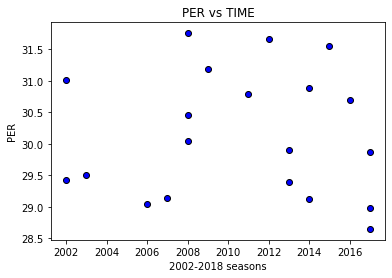

In [17]:
plt.title("PER vs TIME")
plt.xlabel("2002-2018 seasons")
plt.ylabel("PER")

season = [2008,2012,2015,2009,2002,2014,2011,2016,2008,2008,2013, 2017,2003,2002,2013,2007,2014,2006,2017,2017]
per = [31.76,31.67,31.56,31.19,31.01,30.89,30.80,30.70,30.46,30.04,29.90,29.87,29.50,29.43,29.40,29.15,29.12,29.04,28.98,28.65]

plt.scatter(season, per, marker="o", facecolors="blue", edgecolors="black")

plt.show()